<a href="https://colab.research.google.com/github/pwl1ft/ml_ai_scripts_notes/blob/main/data_cleaning_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('real_legitimate_v1.csv')

In [ ]:
print('Dataset overview:')
print(df.info())
print('First 5 rows:')
print(df.head())

Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36755 entries, 0 to 36754
Columns: 484 entries, Package to MalFamily
dtypes: float64(10), int64(469), object(5)
memory usage: 135.7+ MB
None
First 5 rows:
                                      Package  Malware  execve  getuid32  \
0                        outside.walljul01e\n        0       0        35   
1                    org.developerworks.ifp\n        0       0        22   
2                    zen.meditation.android\n        0       0        59   
3  com.kauf.jokes.account1.FunnyAnimalJokes\n        0       0         9   
4                         com.genwi.myalias\n        0       0        24   

   getgid32  geteuid32  getegid32  getresuid32  getresgid32  readahead  ...  \
0         0          0          0            0            0          0  ...   
1         0          0          0            0            0          0  ...   
2         0          0          0            0            0          0  ...   
3   

In [ ]:
print('Missing values:')
print(df.isnull().sum())

Missing values:
Package                   0
Malware                   0
execve                    0
getuid32                  0
getgid32                  0
                      ...  
TotalIntentFilters      275
NrServices              274
Scanners                  0
Detection_Ratio           0
MalFamily             33796
Length: 484, dtype: int64


In [ ]:
print('Summary statistics:')
print(df.describe())

Summary statistics:
       Malware   execve       getuid32      getgid32     geteuid32  \
count  36755.0  36755.0   36755.000000  36755.000000  36755.000000   
mean       0.0      0.0     210.679472      0.007428      3.476180   
std        0.0      0.0    2441.771377      0.136317     70.386928   
min        0.0      0.0       0.000000      0.000000      0.000000   
25%        0.0      0.0      19.000000      0.000000      0.000000   
50%        0.0      0.0      43.000000      0.000000      0.000000   
75%        0.0      0.0     125.000000      0.000000      0.000000   
max        0.0      0.0  224928.000000     18.000000   9108.000000   

          getegid32  getresuid32  getresgid32  readahead   getgroups32  ...  \
count  36755.000000      36755.0      36755.0    36755.0  36755.000000  ...   
mean       0.007781          0.0          0.0        0.0      0.000163  ...   
std        0.152947          0.0          0.0        0.0      0.022130  ...   
min        0.000000          0.0 

In [ ]:
# Add columns for 'Malicious' and 'MalFamilyEncoded' to encode the labels for benign data, and malware family data
df['Malicious'] = df['MalFamily'].notna().astype(int)
df['MalFamily'] = df['MalFamily'].fillna('Benign')
label_encoder = LabelEncoder()
df['MalFamilyEncoded'] = label_encoder.fit_transform(df['MalFamily'])
print('Malware Family Encoding Mapping:')
print(dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))

Malware Family Encoding Mapping:
{'Adwo': 0, 'Agent': 1, 'Airpush/StopSMS': 2, 'AnServer/Answerbot': 3, 'Ansca': 4, 'AppAd': 5, 'AppTrack': 6, 'Arspam': 7, 'Asacub': 8, 'BankBot': 9, 'Basebridge': 10, 'Batmobi': 11, 'Benign': 12, 'Boogr': 13, 'Boqx': 14, 'Cimsci': 15, 'Congur': 16, 'Dabom': 17, 'Dialer': 18, 'Dianjin': 19, 'Dnotua': 20, 'Domob': 21, 'Dougalek': 22, 'Dowgin': 23, 'Downloader': 24, 'DroidCoupon': 25, 'DroidKungFu': 26, 'DroidRooter': 27, 'DroidSheep': 28, 'Ewind': 29, 'FakeAngry': 30, 'FakeApp': 31, 'FakeFlash': 32, 'FakeInst': 33, 'FakeToken': 34, 'Fakeview': 35, 'Fauxcopy': 36, 'Fictus': 37, 'Fokange/Fokonge': 38, 'Fujacks': 39, 'Geinimi': 40, 'GinMaster': 41, 'GoldDream': 42, 'Gumen': 43, 'Hiddad': 44, 'HiddenAds': 45, 'Hispo': 46, 'HongTouTou/Adrd': 47, 'Hqwar': 48, 'Iconosys': 49, 'Imlog': 50, 'Inmobi': 51, 'Jifake': 52, 'Kmin': 53, 'Kuguo': 54, 'LeadBolt': 55, 'LinuxLotoor': 56, 'Locker/SLocker Ransomware': 57, 'MTK': 58, 'Mobclick': 59, 'MobileSpy/Godwon': 60, 'Mo

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Use label encoding for simple categorical variables
label_encoders = {}
for col in categorical_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  label_encoders[col] = le

print('Categorical columns encoded.')

# Find columns with missing values
missing_cols = df.columns[df.isnull().sum() > 0]

# Print missing values count per column
print("Columns with Missing Values:\n")
print(df[missing_cols].isnull().sum())

Categorical columns encoded.
Columns with Missing Values:

Activities                274
NrIntServices             274
NrIntServicesActions      274
NrIntActivities           274
NrIntActivitiesActions    274
NrIntReceivers            274
NrIntReceiversActions     274
TotalIntentFilters        275
NrServices                274
dtype: int64


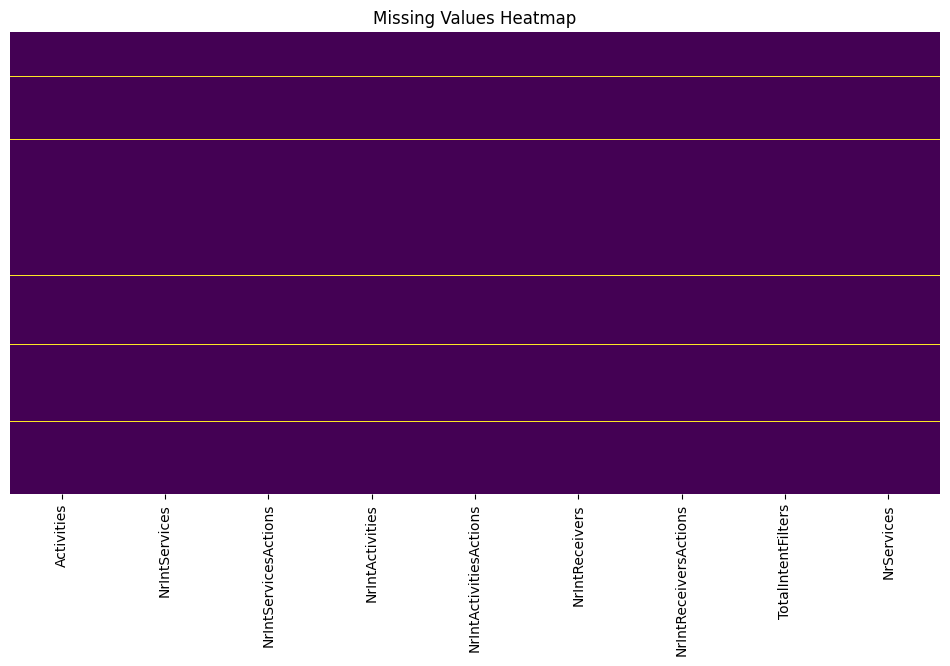

In [ ]:
# Only plot columns where there are missing values in the heatmap
missing_cols = df.columns[df.isnull().sum() > 0]
df_missing = df[missing_cols]

plt.figure(figsize=(12, 6))
sns.heatmap(df_missing.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
none_cols = df.columns[(df == 'None').sum() > 0]  # Columns with 'None' as string

# Combine both sets of columns
columns_to_fix = set(missing_cols).union(set(none_cols))

print("Columns to be fixed:\n", columns_to_fix)

# Replace NaN and 'None' values with 0
df[list(columns_to_fix)] = df[list(columns_to_fix)].replace(['None', None], 0).fillna(0)

# Find columns with missing values
missing_cols = df.columns[df.isnull().sum() > 0]

# Print missing values count per column
print("Columns with Missing Values:\n")
print(df[missing_cols].isnull().sum())

Columns to be fixed:
 {'NrServices', 'Activities', 'NrIntActivitiesActions', 'NrIntReceivers', 'NrIntReceiversActions', 'TotalIntentFilters', 'NrIntServices', 'NrIntServicesActions', 'NrIntActivities'}
Columns with Missing Values:

Series([], dtype: float64)


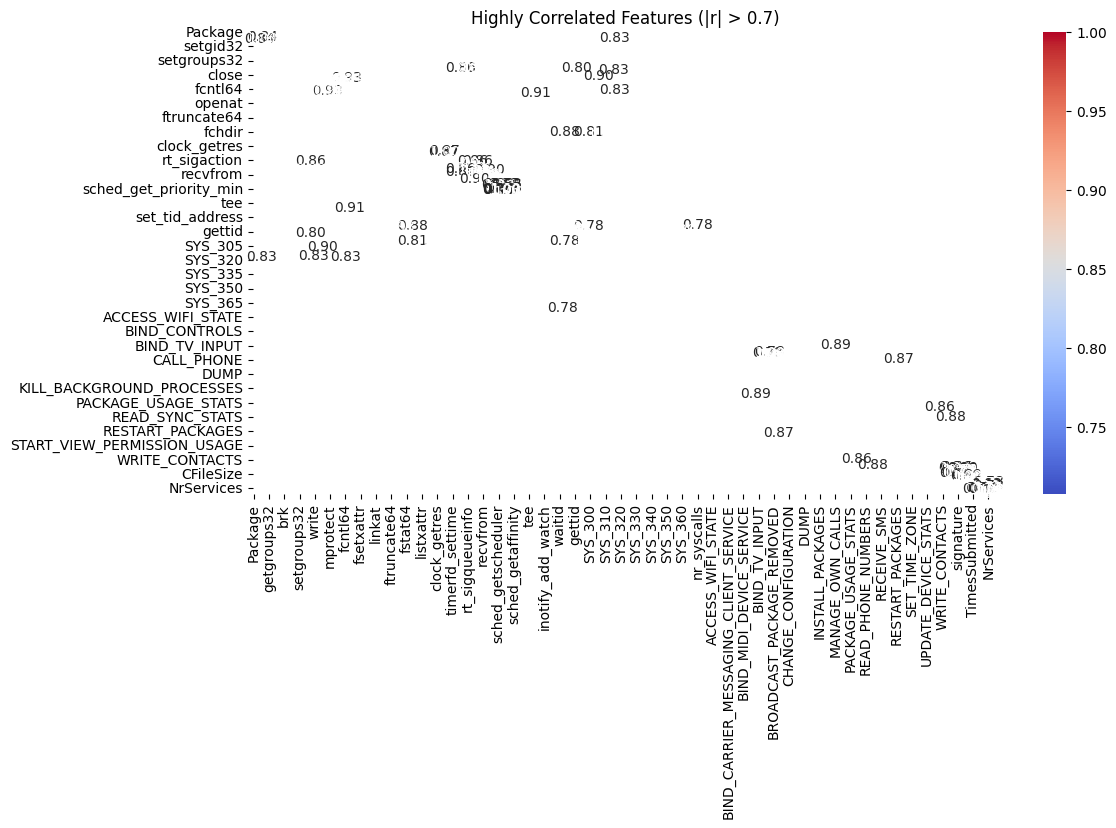

In [ ]:
corr_matrix = df.corr()

threshold = 0.7
high_corr = corr_matrix[abs(corr_matrix) > threshold]

plt.figure(figsize=(12, 6))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Highly Correlated Features (|r| > 0.7)")
plt.show()

In [38]:
categorical_features = df.select_dtypes(include=['object']).columns
if len(categorical_features) > 0:
    for col in categorical_features:
        plt.figure(figsize=(8, 4))
        sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
        plt.title(f"Distribution of {col}")
        plt.show()

In [39]:
print('Data preprocessing ready')

Data preprocessing ready
